# Import JSON Results and plot bar chart for XAI comparison

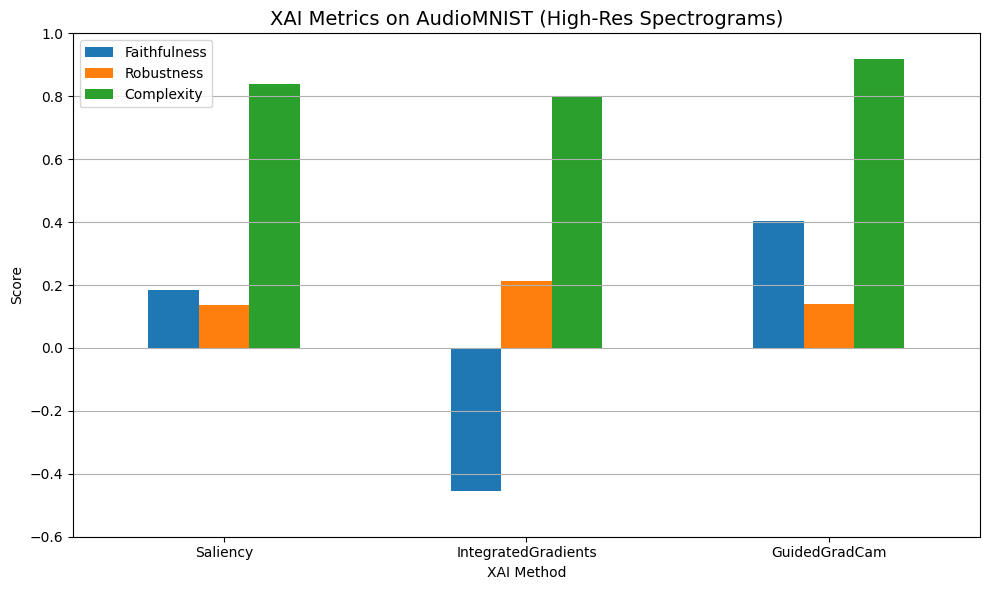

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
JSON_PATH = "xai_results.json"  
OUTPUT_PATH = "audio_xai_metrics_bar.png"

# === LOAD METRIC RESULTS ===
with open(JSON_PATH, "r") as f:
    xai_results = json.load(f)

# === FILTER + FORMAT DATA ===
filtered_data = {
    method: {
        metric: score
        for metric, score in metrics.items()
        if score is not None and metric != "Randomisation"
    }
    for method, metrics in xai_results.items()
}

df = pd.DataFrame(filtered_data).T

# === PLOT ===
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind="bar", ax=ax)
ax.set_title("XAI Metrics on AudioMNIST (High-Res Spectrograms)", fontsize=14)
ax.set_ylabel("Score")
ax.set_xlabel("XAI Method")
ax.set_ylim([-0.6, 1.0])
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()

# === SAVE FIGURE ===
plt.savefig(OUTPUT_PATH)
plt.show()
